### Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**->** Matrix multiplication between a (n,k) matrix and a (k,m) matrix results in a (n,m) matrix. The number of multiplications and additions required can be calculated as follows-

For each element in the resulting matrix (n,m), we perform k multiplications and (k-1) additions.

For an (n,m) matrix, there are n * m elements. Therefore, the total number of multiplications and additions for the entire matrix multiplication is-

Multiplications: n * m * k  
Additions: n * m * (k-1)

### Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import time

a=np.random.randint(9,size=(100,25))
print("a:")
print(a)

b=np.random.randint(9,size=(25,75))
print("b:")
print(b)

print()

print("Multiplication without numpy-")
begin1=time.time()
m=np.zeros((100,75))
for i in range(len(a)):
  for j in range(len(b[0])):
    for k in range(len(b)):
       m[i][j]+=a[i][k]*b[k][j]
end1=time.time()
print("Time taken without numpy is", end1 - begin1)

print()

print("Multiplication with numpy-")
begin2=time.time()
M=np.matmul(a,b)
end2=time.time()
print("Time taken with numpy is", end2 - begin2)

a:
[[6 2 6 ... 6 4 6]
 [4 3 6 ... 2 0 2]
 [0 3 8 ... 8 4 1]
 ...
 [4 6 0 ... 3 3 0]
 [2 2 7 ... 3 0 5]
 [1 8 3 ... 8 6 2]]
b:
[[5 0 6 ... 2 3 6]
 [5 8 4 ... 6 3 3]
 [4 0 4 ... 4 7 5]
 ...
 [2 4 0 ... 7 3 0]
 [4 5 0 ... 5 2 8]
 [7 8 1 ... 2 8 5]]

Multiplication without numpy-
Time taken without numpy is 0.4536430835723877

Multiplication with numpy-
Time taken with numpy is 0.0007386207580566406


We can clearly see that numpy multiplication is faster.

The reason why numpy multiplication is faster than multiplication using list of lists is because of two main reasons-

1. Vectorization: Numpy operations are vectorized, meaning they operate on entire arrays (or matrices) at once. This allows Numpy to fastly execute.
2. Parallelization: NumPy can take advantage of parallel processing when performing certain operations, making it faster for large-scale matrix multiplications.

### Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [2]:
import numpy as np
import copy
import time

arr=[np.random.randint(1,100) for _ in range(10)]
print("Array:", arr)
arr1=copy.copy(arr)
arr2=copy.copy(arr)

print()

begin1=time.time()
m=min(arr)
for j in range((len(arr)//2)-1):
  max_ind=0
  M=arr[0]
  for i in range(len(arr)):
    if M<=arr[i]:
      M=arr[i]
      max_ind=i
  arr[max_ind]=m
max_ind1=0
M1=arr[0]
for i in range(len(arr)):
  if M1<=arr[i]:
    M1=arr[i]
    max_ind1=i
arr[max_ind1]=m
med1=(max(arr)+M1)/2
end1=time.time()
print("Median using given method:",med1)
print("Time taken:",end1-begin1)

print()

begin2=time.time()
arr1.sort()
n=(len(arr1)-1)//2
med2=(arr1[n]+arr1[n+1])/2
end2=time.time()
print("Median using sorting:",med2)
print("Time taken:",end2-begin2)

print()

begin3=time.time()
med3=np.median(arr2)
end3=time.time()
print("Median using numpy:",med3)
print("Time taken:",end3-begin3)

Array: [3, 4, 20, 62, 97, 92, 4, 11, 53, 6]

Median using given method: 15.5
Time taken: 0.0006303787231445312

Median using sorting: 15.5
Time taken: 0.0002300739288330078

Median using numpy: 15.5
Time taken: 0.003453969955444336


Calculating median of array by calculating maximum element approx $n/2$ times takes around $n*(n/2)$ steps as calculating maximum element in an array takes $n$ steps.

Hence the time complexity of calculating median by calculating largest elements
$n/2$ times is $O(n^2)$.

We can do better by first sorting the array and taking the $\frac{(\frac{(n-1)}{2}^{th} element + \frac{(n+1)}{2}^{th} element)}{2}$ of the array because our $n$ is even.

### Question 4
What is the gradient of the following function with respect to x and y?                      
$ x^2y + y^3\sin(x) $

Gradient with respect to x:
$2xy + y^3cos(x)$

Gradient with respect to y:
$x^2 + 3y^2sin(x)$

### Question 5
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [3]:
import jax
import jax.numpy as jnp

def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)
def fx(x,y):
  return 2*x*y + (y**3)*jnp.cos(x)
def fy(x,y):
  return x**2 + 3*(y**2)*jnp.sin(x)

grad_x=jax.grad(f,argnums=0)
print("Gradient w.r.t. x using jax:")
print("At x=1 and y=1 is:",grad_x(1.0,1.0))
print("At x=2 and y=2 is:",grad_x(2.0,2.0))
print("At x=3 and y=3 is:",grad_x(3.0,3.0))
print()

print("Gradient w.r.t. x using analytical solution:")
print("At x=1 and y=1 is:",fx(1,1))
print("At x=2 and y=2 is:",fx(2,2))
print("At x=3 and y=3 is:",fx(3,3))
print()

grad_y=jax.grad(f,argnums=1)
print("Gradient w.r.t. y using jax:")
print("At x=1 and y=1 is:",grad_y(1.0,1.0))
print("At x=2 and y=2 is:",grad_y(2.0,2.0))
print("At x=3 and y=3 is:",grad_y(3.0,3.0))
print()

print("Gradient w.r.t. y using analytical solution:")
print("At x=1 and y=1 is:",fy(1,1))
print("At x=2 and y=2 is:",fy(2,2))
print("At x=3 and y=3 is:",fy(3,3))


Gradient w.r.t. x using jax:
At x=1 and y=1 is: 2.5403023
At x=2 and y=2 is: 4.670825
At x=3 and y=3 is: -8.729797

Gradient w.r.t. x using analytical solution:
At x=1 and y=1 is: 2.5403023
At x=2 and y=2 is: 4.670825
At x=3 and y=3 is: -8.729797

Gradient w.r.t. y using jax:
At x=1 and y=1 is: 3.5244129
At x=2 and y=2 is: 14.911569
At x=3 and y=3 is: 12.81024

Gradient w.r.t. y using analytical solution:
At x=1 and y=1 is: 3.5244129
At x=2 and y=2 is: 14.911569
At x=3 and y=3 is: 12.81024


### Question 6
Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
import sympy as sp

x,y=sp.symbols('x y')
f=(x**2)*y + (y**3)*sp.sin(x)

fx=sp.diff(f,x)
print("Gradient of function f w.r.t. x:",fx)
fy=sp.diff(f,y)
print("Gradient of function f w.r.t. y:",fy)

Gradient of function f w.r.t. x: 2*x*y + y**3*cos(x)
Gradient of function f w.r.t. y: x**2 + 3*y**2*sin(x)


### Question 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
  1. Branch 1
    1. Roll Number: 1, Name: N, Marks:
       1. Maths: 100, English: 70 …
  2. Branch 2
2. 2023
  1. Branch 1
  2. Branch 2
3. 2024
  1. Branch 1
  2. Branch 2
4. 2025
  1. Branch 1
  2. Branch 2

In [5]:
data={2022:{'Branch 1':{'Roll Number 1':{'Name':'Naman','Marks':{'Maths':100,'English':70,'Physics':85}}},
            'Branch 2':{'Roll Number 1':{'Name':'Namo','Marks':{'Maths':70,'English':80,'Physics':65}}}},
      2023:{'Branch 1':{'Roll Number 1':{'Name':'Naan','Marks':{'Maths':0,'English':90,'Physics':95}}},
            'Branch 2':{'Roll Number 1':{'Name':'Nao','Marks':{'Maths':40,'English':40,'Physics':85}}}},
      2024:{'Branch 1':{'Roll Number 1':{'Name':'Namy','Marks':{'Maths':100,'English':90,'Physics':95}}},
            'Branch 2':{'Roll Number 1':{'Name':'Nancy','Marks':{'Maths':50,'English':70,'Physics':65}}}},
      2025:{'Branch 1':{'Roll Number 1':{'Name':'Noony','Marks':{'Maths':60,'English':100,'Physics':65}}},
            'Branch 2':{'Roll Number 1':{'Name':'Nany','Marks':{'Maths':60,'English':70,'Physics':85}}}}}

# Example-
print(data[2022]['Branch 1'])
print(data[2023]['Branch 1']['Roll Number 1'])
print(data[2024]['Branch 2']['Roll Number 1']['Marks'])
print(data[2025]['Branch 1']['Roll Number 1']['Marks']['Physics'])

{'Roll Number 1': {'Name': 'Naman', 'Marks': {'Maths': 100, 'English': 70, 'Physics': 85}}}
{'Name': 'Naan', 'Marks': {'Maths': 0, 'English': 90, 'Physics': 95}}
{'Maths': 50, 'English': 70, 'Physics': 65}
65


### Question 8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Student:
    def __init__(self,roll_number,name,marks):
        self.roll_number=roll_number
        self.name=name
        self.marks=marks

class Branch:
   def __init__(self,name):
        self.name=name
        self.students=[]

   def add_student(self,student):
        self.students.append(student)

class Year:
    def __init__(self,year):
        self.year=year
        self.branches=[]

    def add_branch(self,branch):
        self.branches.append(branch)


# Example-
database=[]

year2022=Year(2022)
branch1_2022=Branch('1')
student1_2022=Student(1,'Naman',{'Maths':100,'English':70,'Physics':85})
branch1_2022.add_student(student1_2022)
year2022.add_branch(branch1_2022)

branch2_2022=Branch('2')
student2_2022=Student(1,'Namo',{'Maths':70,'English':80,'Physics':65})
branch2_2022.add_student(student2_2022)
year2022.add_branch(branch2_2022)
database.append(year2022)

for year in database:
    print(f'Year {year.year}:')
    for branch in year.branches:
        print(f'  Branch:{branch.name}')
        for student in branch.students:
            print(f'    Roll Number:{student.roll_number}')
            print(f'      Name:{student.name}')
            print('      Marks:')
            for subject, score in student.marks.items():
                print(f'        {subject}:{score}')

Year 2022:
  Branch:1
    Roll Number:1
      Name:Naman
      Marks:
        Maths:100
        English:70
        Physics:85
  Branch:2
    Roll Number:1
      Name:Namo
      Marks:
        Maths:70
        English:80
        Physics:65


### Question 9
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
2. $y=x^2$
3. $y=\frac{x^3}{100}$
4. $y=\sin(x)$
5. $y=\frac{\sin(x)}{x}$
6. $y=\log(x)$
7. $y=e^x$

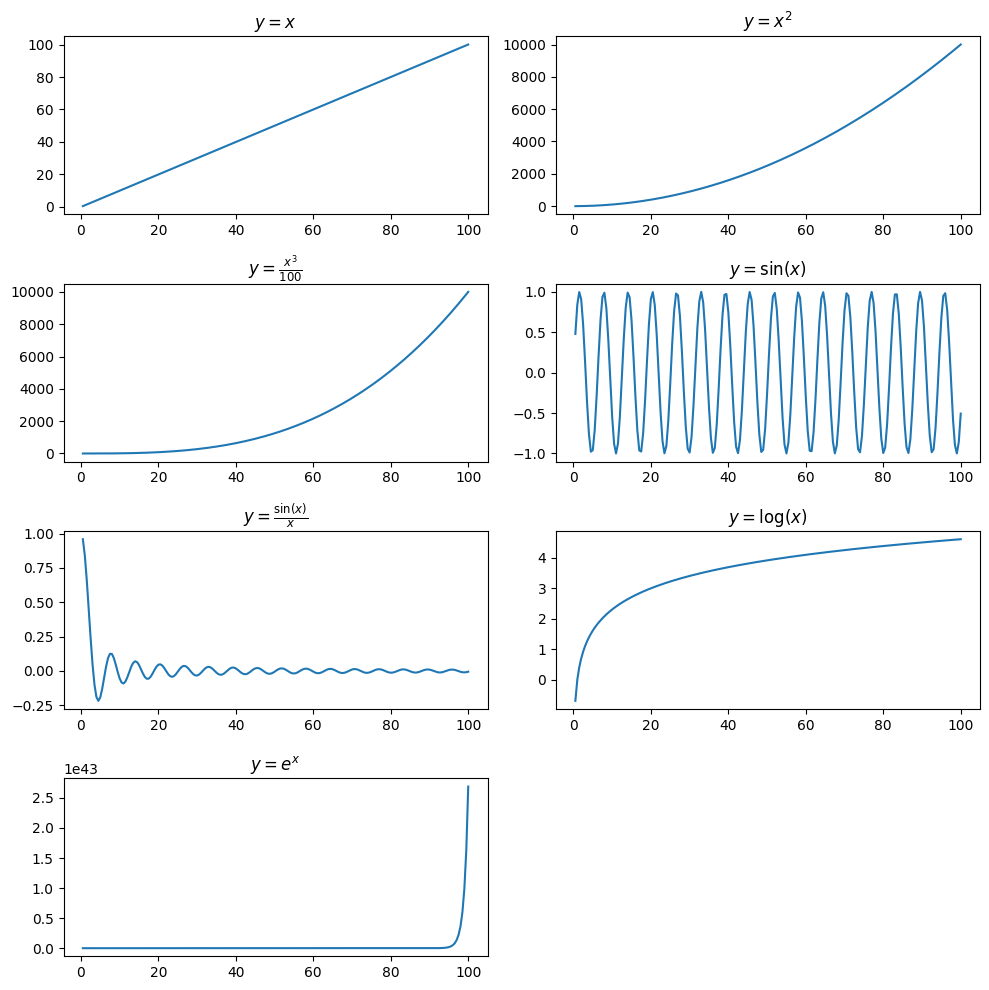

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(0.5,100.5,0.5)

y1=x
y2=x**2
y3=(x**3)/100
y4=np.sin(x)
y5=(np.sin(x))/x
y6=np.log(x)
y7=np.exp(x)

plt.figure(figsize=(10, 10))

plt.subplot(4,2,1)
plt.plot(x,y1)
plt.title('$y = x$')

plt.subplot(4,2,2)
plt.plot(x,y2)
plt.title('$y = x^2$')

plt.subplot(4,2,3)
plt.plot(x,y3)
plt.title('$y = \\frac{x^3}{100}$')

plt.subplot(4,2,4)
plt.plot(x,y4)
plt.title('$y = \\sin(x)$')

plt.subplot(4,2,5)
plt.plot(x,y5)
plt.title('$y = \\frac{\\sin(x)}{x}$')

plt.subplot(4,2,6)
plt.plot(x,y6)
plt.title('$y = \\log(x)$')

plt.subplot(4,2,7)
plt.plot(x,y7)
plt.title('$y = e^x$')

plt.tight_layout()
plt.show()

### Question 10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd

matrix=np.random.uniform(1,2,size=(20,5))
df=pd.DataFrame(matrix,columns=['a','b','c','d','e'])
max_std_col=df.std().idxmax()
min_mean_row=df.mean(axis=1).idxmin()

print('DataFrame:')
print(df)
print()

print('Column with the highest standard deviation:',max_std_col)
print('Row with the lowest mean:',min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.444849  1.663034  1.130766  1.646981  1.455060
1   1.697295  1.900342  1.205262  1.635192  1.146071
2   1.227223  1.898021  1.554978  1.605396  1.344787
3   1.925628  1.479840  1.893162  1.627961  1.055355
4   1.379368  1.237838  1.150245  1.317257  1.429572
5   1.430287  1.976982  1.688274  1.076918  1.676510
6   1.714168  1.209684  1.923654  1.267743  1.641483
7   1.507958  1.529805  1.290775  1.842902  1.118576
8   1.081306  1.128180  1.168970  1.947624  1.166355
9   1.117088  1.594905  1.320821  1.775416  1.723045
10  1.066930  1.999299  1.636577  1.420683  1.770696
11  1.154895  1.231961  1.821980  1.345169  1.166932
12  1.948122  1.541616  1.208383  1.188441  1.219945
13  1.871574  1.799082  1.950450  1.921330  1.275938
14  1.670988  1.537101  1.135288  1.610576  1.254537
15  1.292039  1.002709  1.077803  1.688119  1.950220
16  1.234329  1.293694  1.508507  1.799940  1.701270
17  1.472898  1.670349  1.117714  1

### Question 11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [10]:
import numpy as np
import pandas as pd

matrix=np.random.uniform(1,2,size=(20,5))
df=pd.DataFrame(matrix,columns=['a','b','c','d','e'])

df['f']=df[['a','b','c','d','e']].sum(axis=1)
df['g']=np.where(df['f']<8,'LT8','GT8')

lt8_count=df[df['g']=='LT8'].shape[0]

std_lt8=df.loc[df['g']=='LT8','f'].std()
std_gt8=df.loc[df['g']=='GT8','f'].std()

print('DataFrame:')
print(df)
print()

print("Number of rows where the value in column 'g' is 'LT8':",lt8_count)
print("Standard deviation of column 'f' for 'LT8':",std_lt8)
print("Standard deviation of column 'f' for 'GT8':",std_gt8)


DataFrame:
           a         b         c         d         e         f    g
0   1.434649  1.202140  1.453728  1.657479  1.532437  7.280433  LT8
1   1.747127  1.286307  1.893545  1.471527  1.723915  8.122421  GT8
2   1.413720  1.649242  1.248804  1.026607  1.893230  7.231603  LT8
3   1.407747  1.096122  1.968255  1.323071  1.834773  7.629969  LT8
4   1.185247  1.985879  1.153745  1.041377  1.054449  6.420696  LT8
5   1.103151  1.374534  1.521782  1.390074  1.053579  6.443121  LT8
6   1.359774  1.756430  1.299695  1.120892  1.953161  7.489952  LT8
7   1.469799  1.793442  1.776950  1.568153  1.835093  8.443437  GT8
8   1.782761  1.702530  1.460878  1.650219  1.703751  8.300139  GT8
9   1.197483  1.539325  1.477396  1.953537  1.994532  8.162273  GT8
10  1.173566  1.623256  1.072432  1.903877  1.545214  7.318345  LT8
11  1.959437  1.793553  1.073238  1.473804  1.000744  7.300776  LT8
12  1.498924  1.709195  1.754123  1.706545  1.319012  7.987799  LT8
13  1.722625  1.853669  1.604603  1.6

### Question 12
Write a small piece of code to explain broadcasting in numpy.

In [11]:
import numpy as np

mat=np.array([[1,2,3],[4,5,6]])
res=mat+10

col_scalars=np.array([1,10,100])
res_multiply_col=mat*col_scalars

print('Original Matrix:')
print(mat)
print()

print('Adding a scalar using broadcasting:')
print(res)
print()

print('Multiplying each column by a different scalar using broadcasting:')
print(res_multiply_col)


Original Matrix:
[[1 2 3]
 [4 5 6]]

Adding a scalar using broadcasting:
[[11 12 13]
 [14 15 16]]

Multiplying each column by a different scalar using broadcasting:
[[  1  20 300]
 [  4  50 600]]


### Question 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [12]:
import numpy as np

def argmin(arr):
    min_ele=arr[0]
    min_ind=0
    for i in range(1,len(arr)):
        if arr[i]<min_ele:
            min_ele=arr[i]
            min_ind=i
    return min_ind

marr=[np.random.randint(1,10) for _ in range(10)]
print("Array:",marr)

res=argmin(marr)
print("My argmin result:", res)

np_argmin_res=np.argmin(marr)
print("Numpy argmin result:", np_argmin_res)

Array: [4, 9, 1, 5, 6, 9, 6, 7, 3, 8]
My argmin result: 2
Numpy argmin result: 2
